# **1. Perkenalan Dataset**


1. Nama dataset: Data Science Salaries 2023
2. Sumber: Kaggle (https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)


# **2. Import Library**

In [1]:
#import library for clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# **3. Memuat Dataset**

In [5]:
#load dataset
file_path = '../data/ds_salaries.csv'
df = pd.read_csv(file_path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# **4. Exploratory Data Analysis (EDA)**

In [34]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [35]:
#informasi dataset
df.info()
print('-'*50)
duplicated_rows = df.duplicated().sum()
print(f'Jumlah baris duplikat: {duplicated_rows}')
print('-'*50)

#mengelompokkan kolom berdasarkan data type
dtype = df.dtypes

column_by_dtype = {}
for column, dtype in dtype.items():
    if dtype == 'object':
        column_by_dtype['object'] = column_by_dtype.get('object', []) + [column]
    else:
        column_by_dtype['numeric'] = column_by_dtype.get('numeric', []) + [column]

print('Kolom kategorikal : ', column_by_dtype['object'])
print('Kolom numerikal : ', column_by_dtype['numeric'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
--------------------------------------------------
Jumlah baris duplikat: 1171
--------------------------------------------------
Kolom kategorikal :  ['experience_level', 'employment_type', 'job_title', 'salary_curre

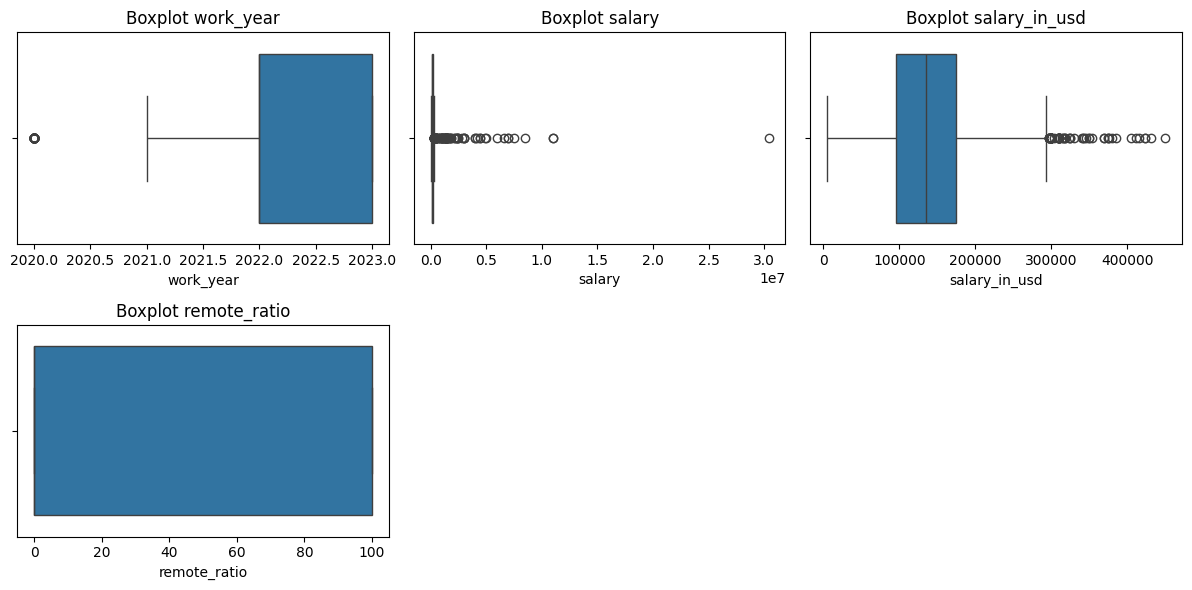

In [36]:
#check outlier with bloxplot all numerical column
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()


In [37]:
#check typo for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Kolom: {column}")
    print(unique_values)

Kolom: experience_level
['SE' 'MI' 'EN' 'EX']
Kolom: employment_type
['FT' 'CT' 'FL' 'PT']
Kolom: job_title
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scienti

In [38]:
#create function analyze correlation
def analyze_correlation(df, target_column, feature_columns):
    correlation_matrix = {}

    for feature_column in feature_columns:
        correlation, _ = pearsonr(df[target_column], df[feature_column])
        correlation_matrix[feature_column] = correlation

        plt.figure(figsize=(10, 6))
        plt.scatter(df[feature_column], df[target_column])
        plt.xlabel(feature_column)
        plt.ylabel(target_column)
        plt.title(f'Scatter Plot: {feature_column} vs {target_column}\nKorelasi Pearson:{correlation:.2f}')
        plt.show()

    return correlation_matrix


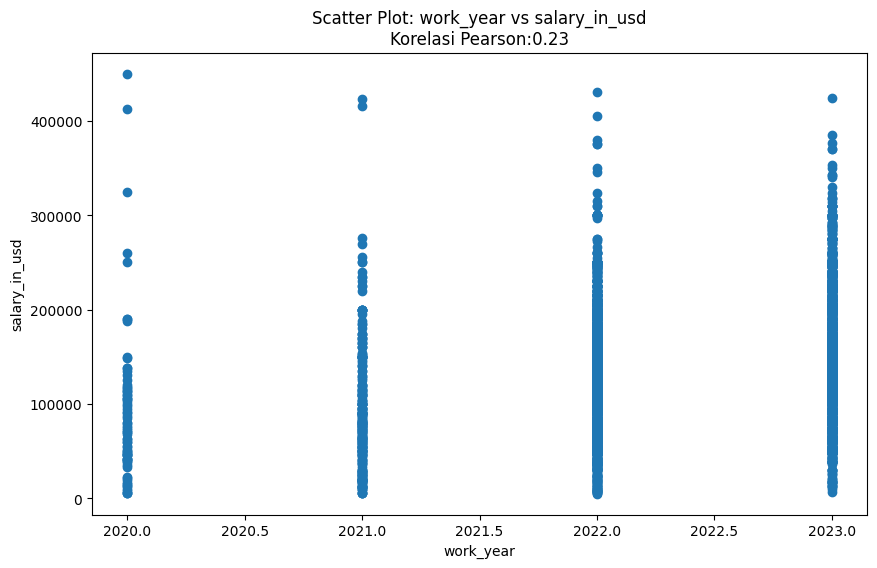

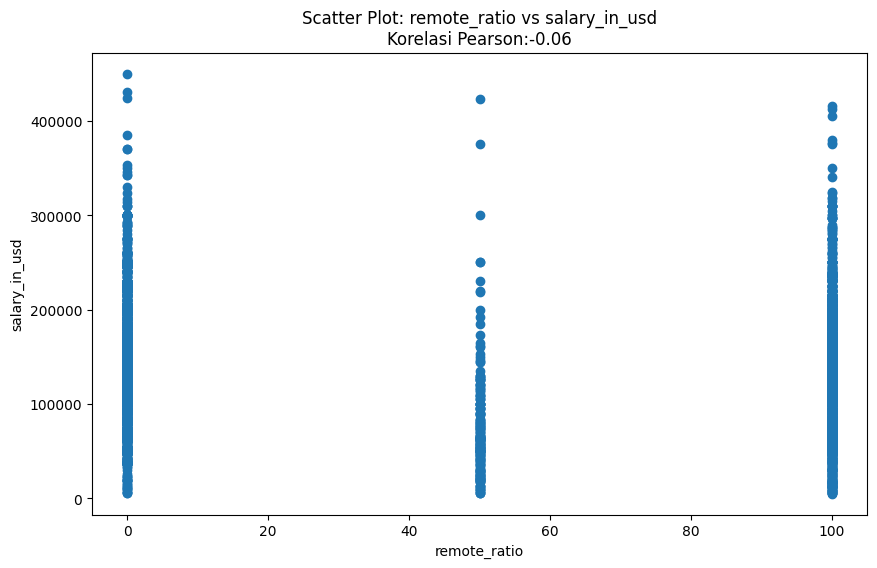

Matriks Korelasi:
{'work_year': np.float64(0.2282900224328786), 'remote_ratio': np.float64(-0.06417098519057553)}


In [39]:
#analyze correlation using function
target_column = 'salary_in_usd'
feature_columns = ['work_year', 'remote_ratio']

correlation_matrix = analyze_correlation(df, target_column, feature_columns)
print("Matriks Korelasi:")
print(correlation_matrix)

In [40]:
#salary_in_usd group by company_location
df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
NZ    125000.000000
BA    120000.000000
IE    114943.428571
JP    114127.333333
SE    105000.000000
Name: salary_in_usd, dtype: float64

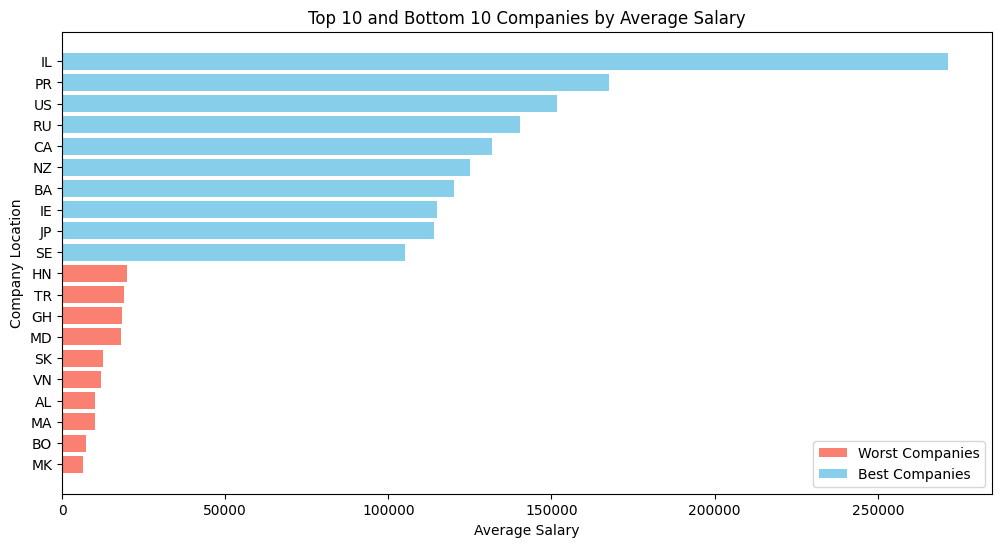

In [41]:
#visualize salary_in_usd group by company_location
avg_salary = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=True)
top_10_companies = avg_salary.tail(10)
bottom_10_companies = avg_salary.head(10)

plt.figure(figsize=(12, 6))
plt.barh(bottom_10_companies.index, bottom_10_companies.values, color='salmon', label='Worst Companies')
plt.barh(top_10_companies.index, top_10_companies.values, color='skyblue', label='Best Companies')
plt.xlabel('Average Salary')
plt.ylabel('Company Location')
plt.title('Top 10 and Bottom 10 Companies by Average Salary')
plt.legend()
plt.show()

In [42]:
# salary_in_usd group by remote_ratio
df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)

remote_ratio
0      144316.202288
100    136481.452830
50      78400.687831
Name: salary_in_usd, dtype: float64

In [43]:
#count all job group by remote_ratio
df.groupby('remote_ratio')['job_title'].count().sort_values(ascending=False)

remote_ratio
0      1923
100    1643
50      189
Name: job_title, dtype: int64

In [44]:
#salary_in_usd group by job_title
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64

In [45]:
#time series salary_in_usd group by work_year
df.groupby('work_year')['salary_in_usd'].mean().sort_values(ascending=False)

work_year
2023    149045.541176
2022    133338.620793
2021     94087.208696
2020     92302.631579
Name: salary_in_usd, dtype: float64

In [46]:
# Loop through each unique year
for year in df['work_year'].unique():
    print(f"Top 5 Job Titles by Salary in USD for Year {year}")

    # Filter data for the specific year
    year_data = df[df['work_year'] == year]

    # Calculate average salary per job title
    top_5_jobs = (
        year_data.groupby('job_title')['salary_in_usd']
        .mean()
        .sort_values(ascending=False)
        .head(5)
    )

    print(top_5_jobs.apply(lambda x: format(x, '.2f')))
    print('-' * 50)

Top 5 Job Titles by Salary in USD for Year 2023
job_title
Director of Data Science    242728.67
AI Scientist                231232.50
Head of Data                224738.67
Computer Vision Engineer    224240.00
Data Lead                   212500.00
Name: salary_in_usd, dtype: object
--------------------------------------------------
Top 5 Job Titles by Salary in USD for Year 2022
job_title
Data Analytics Lead                   405000.00
Data Science Tech Lead                375000.00
Research Engineer                     207870.00
Machine Learning Software Engineer    202033.33
Marketing Data Analyst                200000.00
Name: salary_in_usd, dtype: object
--------------------------------------------------
Top 5 Job Titles by Salary in USD for Year 2020
job_title
Director of Data Science      325000.00
Machine Learning Scientist    260000.00
Research Scientist            246000.00
Data Science Manager          190200.00
Lead Data Scientist           152500.00
Name: salary_in_usd, dty

In [47]:
#top worst salary_in_ussd group by job_title
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True).head(10)

job_title
Power BI Developer                     5409.00
Product Data Scientist                 8000.00
Staff Data Analyst                    15000.00
3D Computer Vision Researcher         21352.25
Autonomous Vehicle Technician         26277.50
Compliance Data Analyst               30000.00
Principal Data Architect              38154.00
Machine Learning Research Engineer    42819.25
Insight Analyst                       46786.00
Data DevOps Engineer                  53654.00
Name: salary_in_usd, dtype: float64

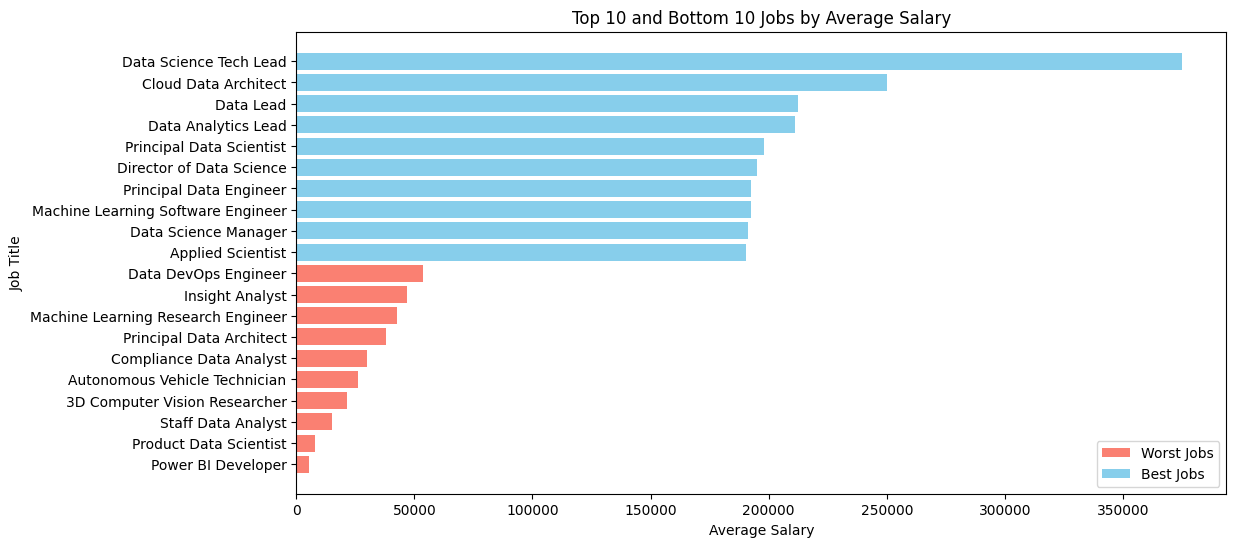

In [48]:
#visualize the best and worst job_title based on salary_in_usd
avg_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True)
top_10_jobs = avg_salary.tail(10)
bottom_10_jobs = avg_salary.head(10)

plt.figure(figsize=(12, 6))
plt.barh(bottom_10_jobs.index, bottom_10_jobs.values, color='salmon', label='Worst Jobs')
plt.barh(top_10_jobs.index, top_10_jobs.values, color='skyblue', label='Best Jobs')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top 10 and Bottom 10 Jobs by Average Salary')
plt.legend()
plt.show()

# **5. Data Preprocessing**

In [49]:
#drop duplicate
df.drop_duplicates(inplace=True)
print(df.shape)

(2584, 11)


In [50]:
df.drop('salary', axis=1, inplace=True)
df.drop('salary_currency', axis=1, inplace=True)

print(df.shape)

(2584, 9)


In [51]:
#encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Ordinal Encoding
df['experience_level'] = df['experience_level'].map({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
df['company_size'] = df['company_size'].map({'S': 1, 'M': 2, 'L': 3})

# One-Hot Encoding
employment_type_encoded = pd.get_dummies(df['employment_type'], prefix='employment_type')

df = pd.concat([df, employment_type_encoded], axis=1)
df.drop(['employment_type'], axis=1, inplace=True)

# Frequency Encoding for job_title
df['job_title_freq'] = df['job_title'].map(df['job_title'].value_counts())
df.drop('job_title', axis=1, inplace=True)

df.head()

,work_year,experience_level,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_freq
0,2023,3,85847,ES,100,ES,3,False,False,True,False,8
1,2023,2,30000,US,100,US,1,True,False,False,False,34
2,2023,2,25500,US,100,US,1,True,False,False,False,34
3,2023,3,175000,CA,100,CA,2,False,False,True,False,538
4,2023,3,120000,CA,100,CA,2,False,False,True,False,538


In [52]:
print(df.shape)

(2584, 12)


In [53]:
# Frequency Encoding untuk 'employee_residence'
residence_freq = df['employee_residence'].value_counts()
df['employee_residence_encoded'] = df['employee_residence'].map(residence_freq)

# Frequency Encoding untuk 'company_location'
location_freq = df['company_location'].value_counts()
df['company_location_encoded'] = df['company_location'].map(location_freq)

df.drop(['employee_residence', 'company_location'], axis=1, inplace=True)

print(df[['employee_residence_encoded', 'company_location_encoded']].head())


   employee_residence_encoded  company_location_encoded
0                          47                        44
1                        1893                      1929
2                        1893                      1929
3                          81                        83
4                          81                        83


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [54]:
# Scaling Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# KMeans Clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(scaled_data, cluster_labels)

print(f"Silhouette Score for {n_clusters} clusters: {sil_score:.4f}")

Silhouette Score for 6 clusters: 0.2513


## **b. Evaluasi Model Clustering**

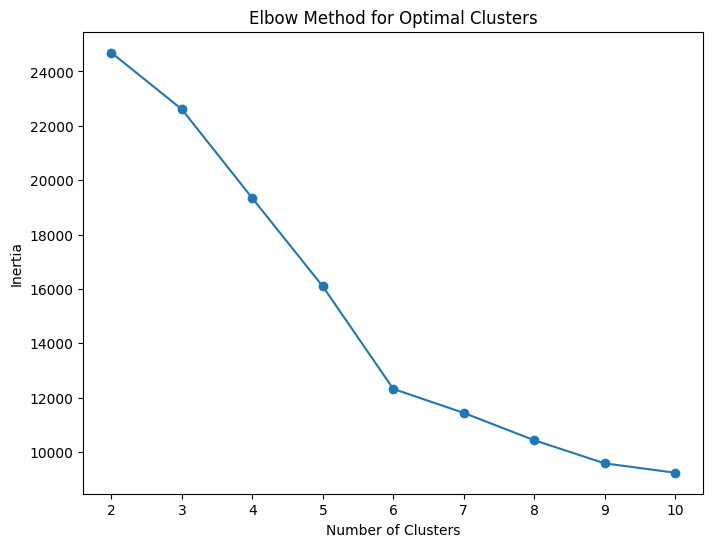

In [55]:
#elbow method
inertia_values = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


## **c. Feature Selection (Opsional)**

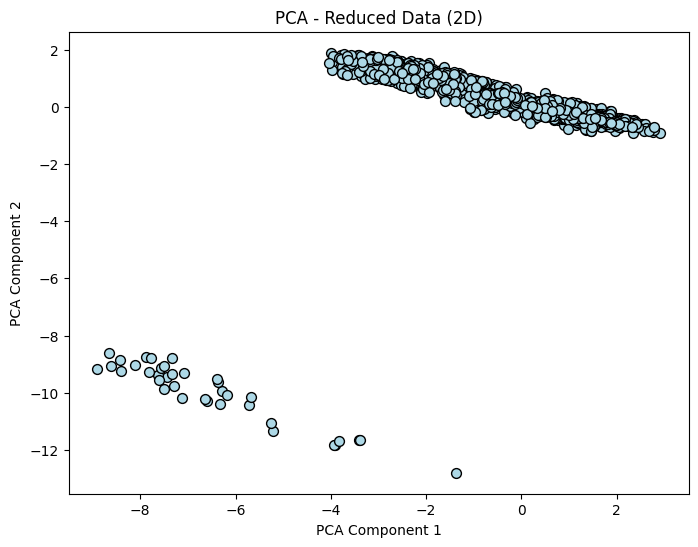

In [56]:
# Reduce dimention PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualize PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='lightblue', edgecolor='k', s=50)
plt.title("PCA - Reduced Data (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


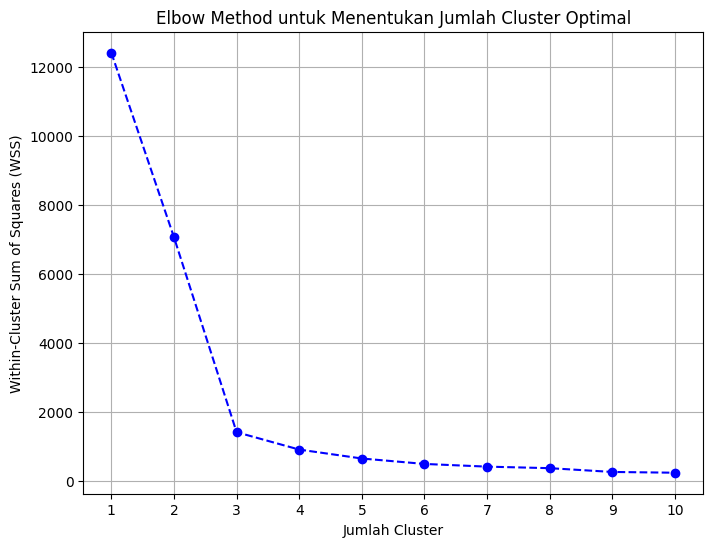

In [57]:
# Elbow method
wss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_data)
    wss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o', color='b', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [58]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette Score
sil_score = silhouette_score(pca_data, cluster_labels)
print(f"Silhouette Score untuk data yang direduksi dengan PCA: {sil_score:.4f}")

Silhouette Score untuk data yang direduksi dengan PCA: 0.7424


## **d. Visualisasi Hasil Clustering**

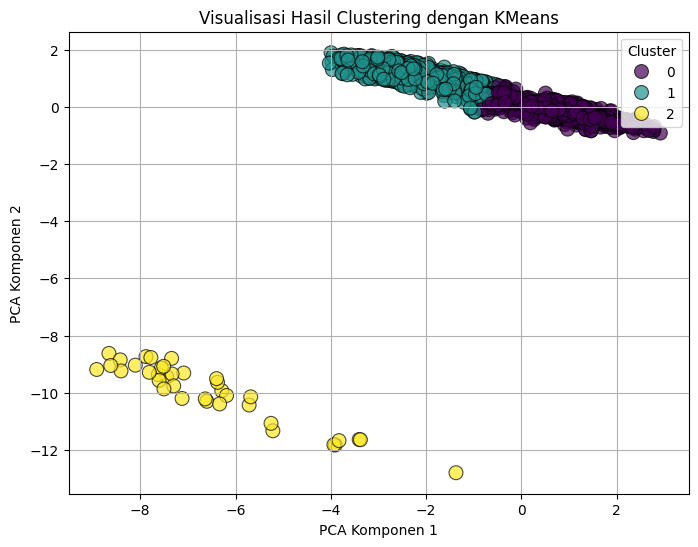

In [59]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('Visualisasi Hasil Clustering dengan KMeans')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

In [60]:
#calculate means each feature
df['cluster'] = cluster_labels
cluster_means = df.groupby('cluster').mean()

print(cluster_means)


           work_year  experience_level  salary_in_usd  remote_ratio  \
cluster                                                               
0        2022.460963          2.751872  156424.095187     46.604278   
1        2021.899557          2.119645   73695.571640     59.601182   
2        2021.567568          1.702703   62827.567568     79.729730   

         company_size  employment_type_CT  employment_type_FL  \
cluster                                                         
0            2.083422             0.00000             0.00000   
1            2.163959             0.00000             0.00000   
2            1.864865             0.27027             0.27027   

         employment_type_FT  employment_type_PT  job_title_freq  \
cluster                                                           
0                       1.0            0.000000      355.501604   
1                       1.0            0.000000      299.035451   
2                       0.0            0.459459   

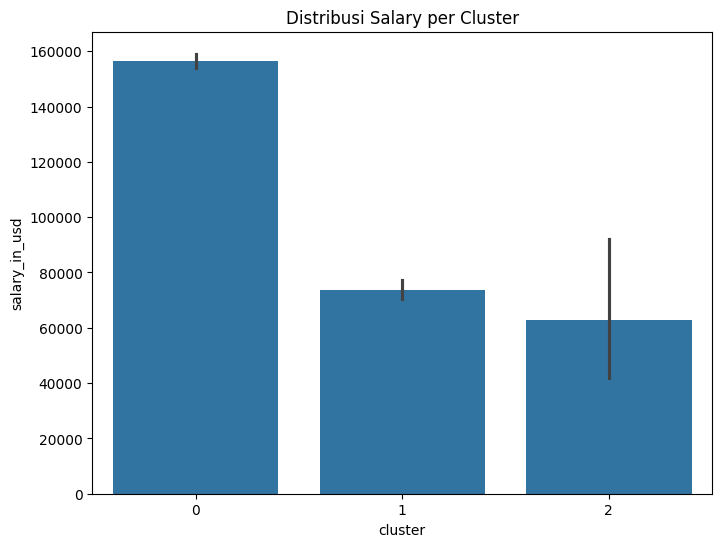

In [61]:
# visualize salary_in_usd by cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='cluster', y='salary_in_usd', data=df)
plt.title('Distribusi Salary per Cluster')
plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  - Tahun bekerja: Rata-rata tahun bekerja adalah 2022.46, menunjukkan pekerja lebih baru dibanding cluster lain.
  - Level pengalaman: Rata-rata level pengalaman adalah 2.75, menandakan mayoritas pekerja di cluster ini adalah senior.
  - Gaji (USD): Gaji rata-rata adalah $156,424, menunjukkan bahwa pekerja ini menerima kompensasi tinggi.
  - Remote ratio: Sebanyak 46.6% pekerjaan dilakukan secara remote, menandakan kombinasi onsite dan remote.
  - Ukuran perusahaan: Perusahaan rata-rata berukuran besar (2.08).
  - Tipe pekerjaan: Hampir semua bekerja full-time (100%).
  - Lokasi: Rata-rata lokasi pekerja memiliki nilai encoded 1,872, sedangkan lokasi perusahaan encoded 1,912, menunjukkan perusahaan besar di negara maju.

2. Cluster 1:
  - Tahun bekerja: Rata-rata tahun bekerja adalah 2021.89, sedikit lebih lama dari Cluster 0.
  - Level pengalaman: Rata-rata level pengalaman adalah 2.12, menunjukkan bahwa pekerja di cluster ini berada pada tingkat mid-level.
  - Gaji (USD): Gaji rata-rata adalah $73,695, lebih rendah dari Cluster 0, namun moderat.
  - Remote ratio: Sebanyak 59.6% pekerjaan dilakukan secara remote, lebih tinggi dari Cluster 0.
  - Ukuran perusahaan: Perusahaan rata-rata berukuran menengah (2.16).
  - Tipe pekerjaan: Mayoritas bekerja full-time (100%).
  - Lokasi: Lokasi pekerja dan perusahaan memiliki nilai encoded rata-rata 159 dan 224, menunjukkan perusahaan kecil/menengah.

3. Cluster 2:
  - Tahun bekerja: Rata-rata tahun bekerja adalah 2021.57, yang paling lama di antara cluster.
  - Level pengalaman: Rata-rata level pengalaman adalah 1.70, menandakan sebagian besar adalah entry-level.
  - Gaji (USD): Gaji rata-rata adalah $62,827, yang terendah.
  - Remote ratio: Sebanyak 79.7% pekerjaan dilakukan secara remote, paling banyak dibanding cluster lain.
  - Ukuran perusahaan: Perusahaan rata-rata berukuran kecil (1.86).
  - Tipe pekerjaan: Sebagian besar bekerja part-time (45.9%) atau kontrak (27.0%).
  - Lokasi: Lokasi pekerja dan perusahaan memiliki nilai encoded rata-rata 425 dan 949, menunjukkan perusahaan di negara berkembang atau startup.


Rekomendasi bisnis bagi perusahaan menjual pelatihan digital atau bootcamp online

1. Cluster 0 adalah pekerja senior dengan gaji tinggi di perusahaan besar, cocok untuk strategi retention.
2. Cluster 1 adalah mid-level worker, fokus pada pengembangan karir dapat meningkatkan engagement.
3. Cluster 2 adalah entry-level worker di perusahaan kecil/startup, cocok untuk program pelatihan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [62]:
#epkspor labeled dataset
df.to_csv('ds_salaries_labeled.csv', index=False)

In [63]:
pip freeze > requirement.txt

Note: you may need to restart the kernel to use updated packages.
